In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Чтение файла CSV
df = pd.read_csv('contracts.csv', sep=';')

# Просмотр первых строк данных
df.head()

,rn_eis,inn,method_procurement,nmck,fact_pay,price,status,duration,oik,view_oik
0,1503800433123000013,5038004331,EA,"147608,34","134189,40","134189,40",Executed,214,"20128,41",Pledging_money
1,1503800433123000014,5038004331,EA,"1767150,03","1503380,03","1530000,03",Terminated,359,"229500,00",Independent_guarantee
2,1504201090923000009,5042010909,EA,"108107,53","93599,58","93599,59",Terminated,365,"14039,94",Pledging_money
3,1504201090923000008,5042010909,EA,"183425,00","166750,00","166750,00",Executed,365,"25012,50",Pledging_money
4,1504201090923000007,5042010909,EA,"430618,06","391470,96","391470,96",Executed,365,"58720,64",Pledging_money


In [ ]:
# Посмотрим структуру данных и типы колонок
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51028 entries, 0 to 51027
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rn_eis              51028 non-null  int64 
 1   inn                 51028 non-null  int64 
 2   method_procurement  51028 non-null  object
 3   nmck                51028 non-null  object
 4   fact_pay            51028 non-null  object
 5   price               51028 non-null  object
 6   status              51028 non-null  object
 7   duration            51028 non-null  int64 
 8   oik                 51028 non-null  object
 9   view_oik            51028 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.9+ MB


In [ ]:
# Меняем тип для колонок 'nmck', 'percent_decrease', 'fact_pay', 'price', 'oik'
# Список колонок для преобразования
cols = ['nmck', 'fact_pay', 'price', 'oik']

# Замена во всех выбранных колонках
df[cols] = (
    df[cols]
    .replace({"\.": "", ",": "."}, regex=True)
    .astype(float)
)

In [ ]:
# Преобразуем колонки 'inn', 'method_procurement', 'view_oik',  и целевое переменную 'status' с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df['inn'] = l.fit_transform(df['inn'])
df['method_procurement'] = l.fit_transform(df['method_procurement'])
df['view_oik'] = l.fit_transform(df['view_oik'])
df['status'] = l.fit_transform(df['status'])

In [ ]:
# Просмотр первых строк данных после изменения типов и преобразования
df.head()

,rn_eis,inn,method_procurement,nmck,fact_pay,price,status,duration,oik,view_oik
0,1503800433123000013,1538,0,147608.34,134189.40,134189.40,0,214,20128.41,1
1,1503800433123000014,1538,0,1767150.03,1503380.03,1530000.03,1,359,229500.00,0
2,1504201090923000009,1722,0,108107.53,93599.58,93599.59,1,365,14039.94,1
3,1504201090923000008,1722,0,183425.00,166750.00,166750.00,0,365,25012.50,1
4,1504201090923000007,1722,0,430618.06,391470.96,391470.96,0,365,58720.64,1


In [ ]:
# Исключим колонку с реестровыми номерами из отчета:
df.drop(columns=['rn_eis']).describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
inn,51028.000000,1162.041252,698.136018,0.000000,611.000000,1116.000000,1714.000000,2409.000000
method_procurement,51028.000000,0.410069,0.754632,0.000000,0.000000,0.000000,0.000000,2.000000
nmck,51028.000000,3856879.014354,18761728.641150,0.000000,159488.965000,640033.460000,2033826.527500,1985548923.070000
fact_pay,51028.000000,3166563.944395,16038939.690352,0.000000,110658.682500,482750.430000,1570128.980000,1632584625.600000
price,51028.000000,3404759.117102,16696498.379835,0.000000,141550.875000,569025.260000,1800000.000000,1805044475.520000
status,51028.000000,0.269793,0.443857,0.000000,0.000000,0.000000,1.000000,1.000000
duration,51028.000000,180.443874,118.846364,0.000000,71.000000,154.000000,282.000000,396.000000
oik,51028.000000,671895.961219,3730601.358006,0.000000,16283.940000,73656.000000,267642.200000,442111783.000000
view_oik,51028.000000,0.544603,0.498011,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
# Проверим наличие отсутствующих значений:
df.isnull().sum()

,0
rn_eis,0
inn,0
method_procurement,0
nmck,0
fact_pay,0
price,0
status,0
duration,0
oik,0
view_oik,0


In [ ]:
# Выбираем колонки для проверки на наличие нулевых значений:
columns_to_check = ['nmck', 'price']

zero_counts = df[columns_to_check].eq(0).sum()
print(zero_counts)

nmck     7
price    7
dtype: int64


In [ ]:
# Удаляем строки, где в любой из колонок есть 0:
data = df[~df[columns_to_check].eq(0).any(axis=1)]

print(f"Было строк: {len(df)}")
print(f"Стало строк: {len(data)}")
print(f"Удалено строк: {len(df) - len(data)}")

Было строк: 51028
Стало строк: 51021
Удалено строк: 7


In [ ]:
# Проверим наличие дубликатов в колонке с реестровым номером (rn_eis):
value_counts = data['rn_eis'].value_counts()
duplicates = value_counts[value_counts > 1]
duplicates

,count
rn_eis,
2507401322924000498,2
2507401322924000506,2
3507900292924000062,2
2500104416924000069,2
3504718878024000002,2
...,...
3503604603024000001,2
3503616951424000018,2
3503603709924000013,2


In [ ]:
# Удалим дубликаты в колонке с реестровым номером, т.к этот номер индивидуалент для каждого контракта (rn_eis):
data = data.drop_duplicates(subset=['rn_eis'])

# Перепроверим на наличие дубликатов в колонке rn_eis:
value_counts = data['rn_eis'].value_counts()
duplicates = value_counts[value_counts > 1]
duplicates

,count
rn_eis,


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49446 entries, 0 to 51027
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rn_eis              49446 non-null  int64  
 1   inn                 49446 non-null  int64  
 2   method_procurement  49446 non-null  int64  
 3   nmck                49446 non-null  float64
 4   fact_pay            49446 non-null  float64
 5   price               49446 non-null  float64
 6   status              49446 non-null  int64  
 7   duration            49446 non-null  int64  
 8   oik                 49446 non-null  float64
 9   view_oik            49446 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 4.1 MB


## Визуализация данных

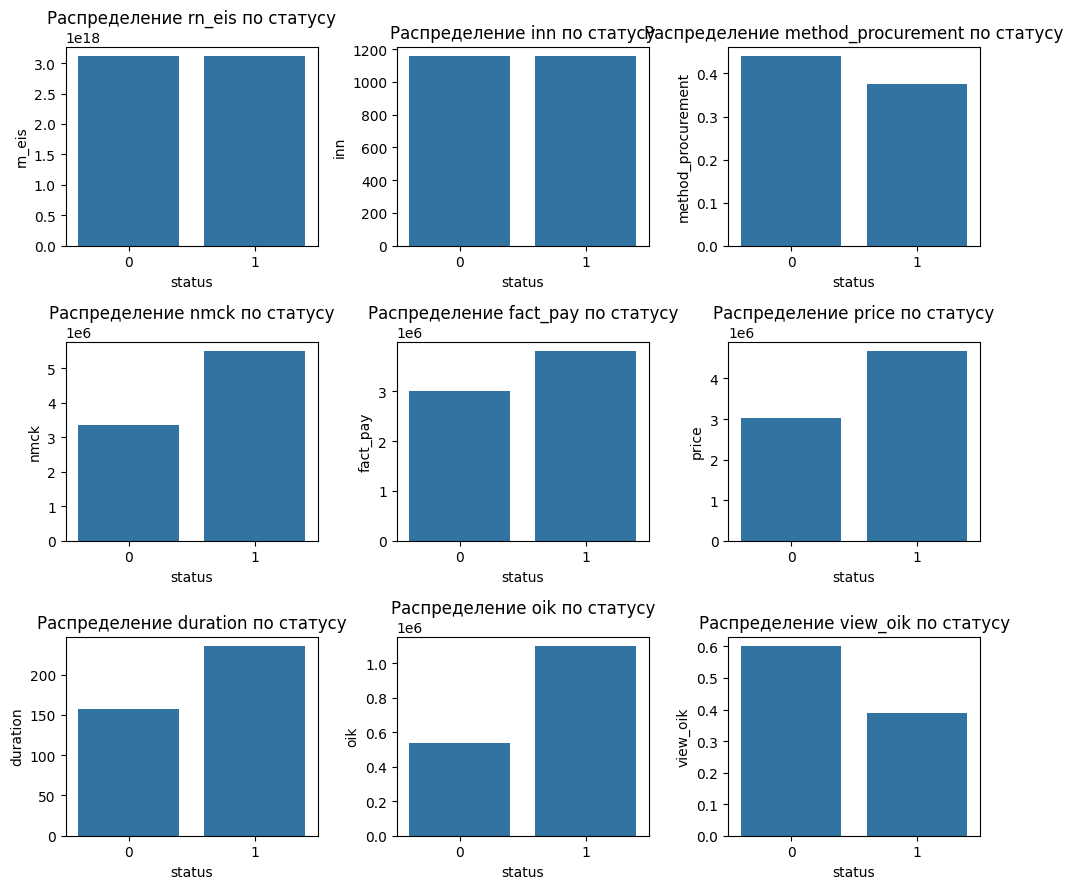

In [ ]:
# Анализируем как распределяются переменные по статусам

import math

# Исключаем колонку status из анализа
variables = [col for col in data.columns if col != 'status']

# Рассчитываем количество строк для 3-колоночной сетки
n_rows = math.ceil(len(variables) / 3)

# Создаем сетку графиков (3 колонки)
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(10, 3*n_rows))

# Выравниваем axes в плоский массив для удобства итерации
axes = axes.flatten()

for i, var in enumerate(variables):
    if pd.api.types.is_numeric_dtype(data[var]):
        # Для числовых переменных - barplot
        sns.barplot(x=data['status'], y=data[var], ax=axes[i], errorbar=None)
    else:
        # Для категориальных переменных - countplot
        sns.countplot(x=data[var], hue=data['status'], ax=axes[i])

    axes[i].set_title(f'Распределение {var} по статусу')
    axes[i].tick_params(axis='x', rotation=0)

    # Аккуратно удаляем легенду, если она существует
    legend = axes[i].get_legend()
    if legend is not None:
        legend.remove()

# Скрываем пустые графики, если количество переменных не кратно 3
for j in range(len(variables), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

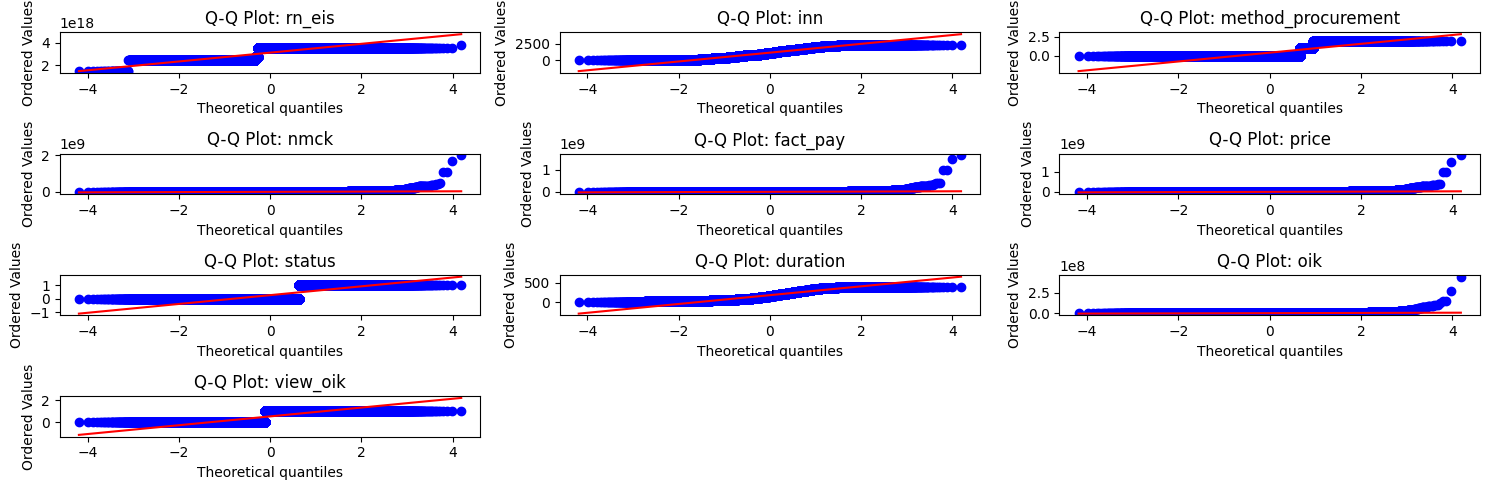

In [ ]:
import scipy.stats as stats

# Построение всех Q-Q plot на одном графике
plt.figure(figsize=(15, 5))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {column}')
plt.tight_layout()
plt.show()

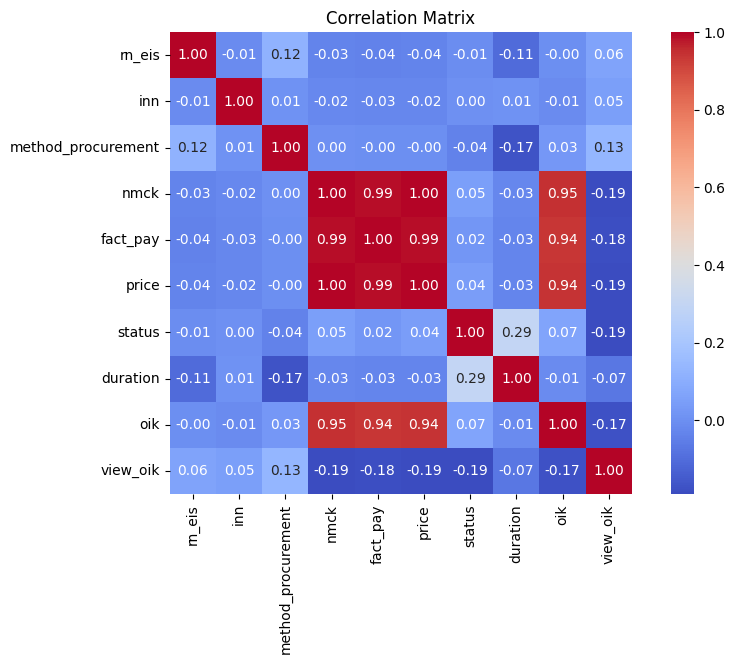

In [ ]:
# Построение матрицы корреляции
correlation_matrix = data.corr()

# Настройка размера графика
plt.figure(figsize=(10, 6))

# Построение тепловой карты корреляции
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)

# Заголовок и отображение
plt.title('Correlation Matrix')
plt.show()

Определение и очистка данных от выбросов

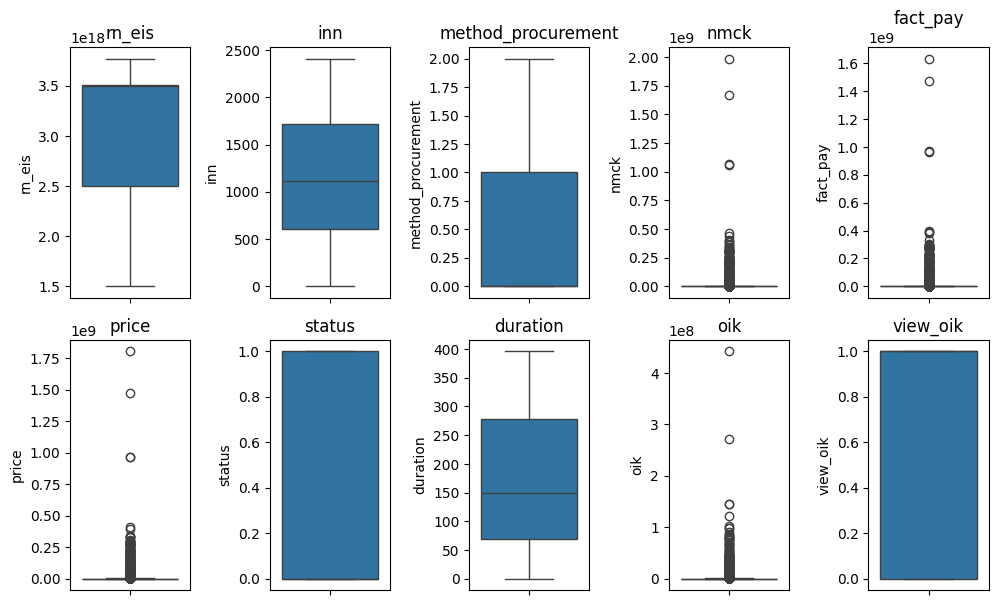

In [ ]:
# Создаем фигуру с несколькими subplots и отслеживаем наличие выбросов
num_cols = len(data.columns)
n_rows = 2
n_cols = (num_cols + 1) // 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 6))

for i, col in enumerate(data.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(data=data, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)

if num_cols % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [ ]:
# Определяем количество выбросов в колонках 'nmck', 'fact_pay', 'price', 'oik'
columns_to_check = ['nmck', 'fact_pay', 'price', 'oik']

outliers_dict = {}

for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outliers_dict[col] = outliers

    print(f"Выбросы в колонке {col}: {len(outliers)} записей")

Выбросы в колонке nmck: 7088 записей
Выбросы в колонке fact_pay: 7163 записей
Выбросы в колонке price: 7111 записей
Выбросы в колонке oik: 7366 записей


In [ ]:
# Логарифмирование данных
for col in columns_to_check:
    if data[col].min() > 0:  # Логарифм определен для положительных чисел
        data[col] = np.log1p(data[col])  # log1p избегает log(0)

In [ ]:
# Проверяем баланс классов. Является ли выборка сбалансированной?
data['status'].value_counts(sort = False)

,count
status,
0,36409
1,13037


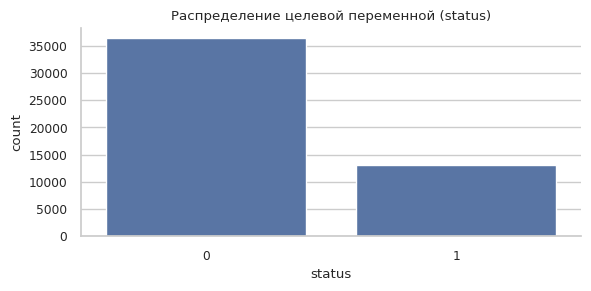

In [ ]:
# Визуализируем распределение целевой переменной по классам.
sns.set(style="whitegrid", font_scale=0.8)
plt.figure(figsize=(6, 3))
sns.countplot(x=data['status'])
plt.title('Распределение целевой переменной (status)')
sns.despine()
plt.tight_layout()
plt.show()

1. Подготовка целевой переменной и входных данных

In [ ]:
#Применим метод нормализации (масштабирования) данных Robust Scaling, который устойчив к выбросам:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

#Выделяем признаки и целевую переменную
X = data.drop(columns=['status'])
y = data['status']

#Инициализация
rscaler = RobustScaler()

#Масштабирование
X_scaled = rscaler.fit_transform(X)

# Преобразование обратно в DataFrame с сохранением названий столбцов
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

## 0. Логистическая регрессия (Logistic Regression)

1. Обучение модели

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Создание и обучение модели
model0 = LogisticRegression(max_iter=1000, solver='liblinear')
model0.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

2. Оценка модели

In [ ]:
# Сделаем прогнозы на тестовом наборе и рассчитаем метрики
# Предсказываем класс для тестового набора
y_pred0 = model0.predict(X_test)

# Рассчитываем точность
accuracy = accuracy_score(y_test, y_pred0)
print(f"Точность модели: {accuracy:.2f}")

# Отчет по качеству модели
print(classification_report(y_test, y_pred0))

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred0)
print(conf_matrix)

Точность модели: 0.86
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7278
           1       0.92      0.51      0.66      2612

    accuracy                           0.86      9890
   macro avg       0.89      0.75      0.78      9890
weighted avg       0.87      0.86      0.84      9890

[[7165  113]
 [1276 1336]]


2.1 Использование SMOTE для устранения дисбаланса классов

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Повторно обучаем модель на резамплированных данных
model0_smote = LogisticRegression(max_iter=1000, solver='liblinear')
model0_smote.fit(X_resampled, y_resampled)

# Прогнозируем и оцениваем
y_pred_smote0 = model0_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote0))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7278
           1       0.79      0.93      0.85      2612

    accuracy                           0.92      9890
   macro avg       0.88      0.92      0.90      9890
weighted avg       0.92      0.92      0.92      9890



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn import metrics

confusion_mat = confusion_matrix(y_test, y_pred_smote0)
print("Точность:", accuracy_score(y_test, y_pred_smote0))
print("Точность:", precision_score(y_test, y_pred_smote0, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred_smote0, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred_smote0, average = 'binary'))


Точность: 0.9150657229524772
Точность: 0.7867313915857606
Полнота: 0.9307044410413476
F1-мера: 0.8526832690284111


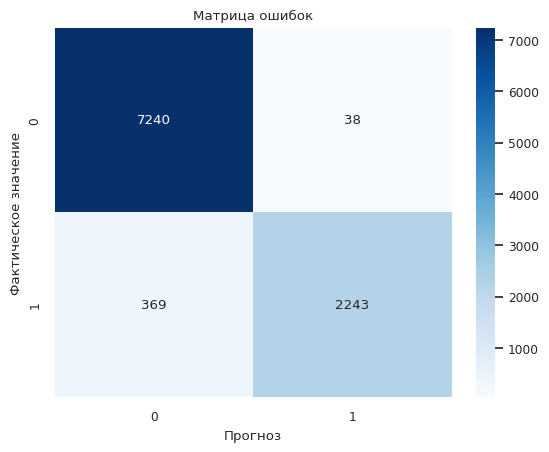

In [ ]:
# Построение матрицы ошибок
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

4. Построение ROC-кривой

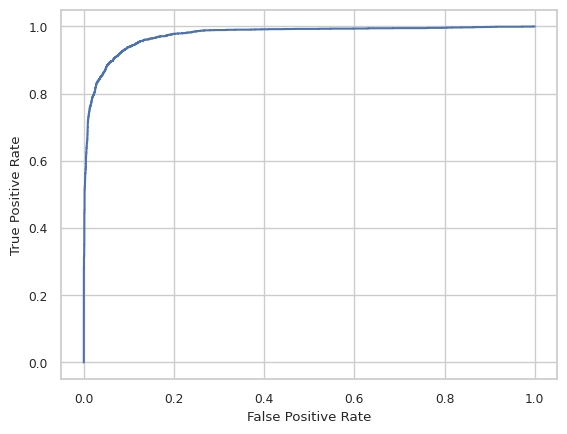

In [ ]:
#Предсказываем вероятности
y_pred_proba0 = model0_smote.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba0)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Рассчитываем значение метрики AUC
auc = metrics.roc_auc_score(y_test, y_pred_proba0)
print("AUC: %.3f" % auc)

AUC: 0.975


In [ ]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

## 1. Деревья решений

1. Обучение модели

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создание и обучение модели

model1 = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, class_weight='balanced')
#model1.fit(X_resampled, y_resampled)
model1.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred1 = model1.predict(X_test)

2. Оценка модели

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred1))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred1))

Accuracy: 0.8914054600606673

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7278
           1       0.75      0.88      0.81      2612

    accuracy                           0.89      9890
   macro avg       0.85      0.89      0.87      9890
weighted avg       0.90      0.89      0.89      9890


Матрица ошибок:
[[6513  765]
 [ 309 2303]]


3. Визуализация дерева

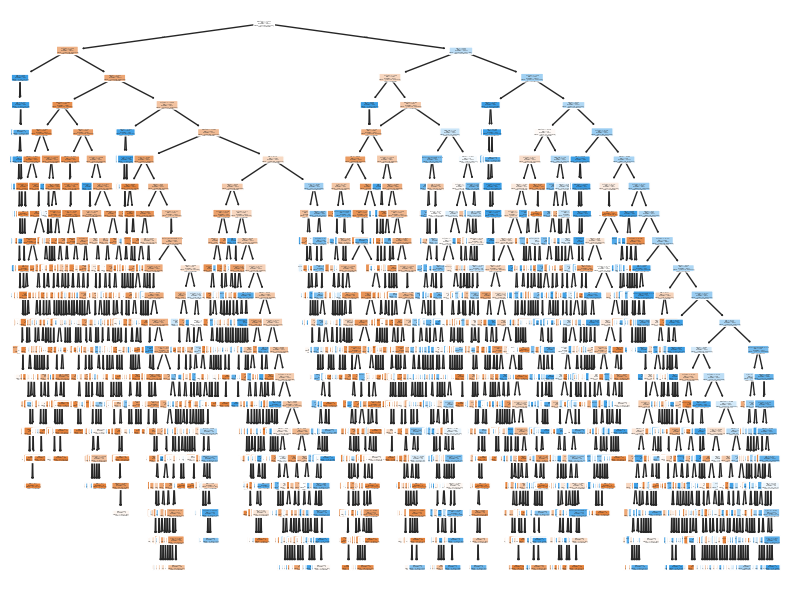

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plot_tree(
    model1,
    feature_names=X.columns,
    class_names=['Исполнен', 'Расторгнут'],
    filled=True,
    rounded=True
)
plt.tight_layout()
plt.show()

4. Построение ROC-кривой

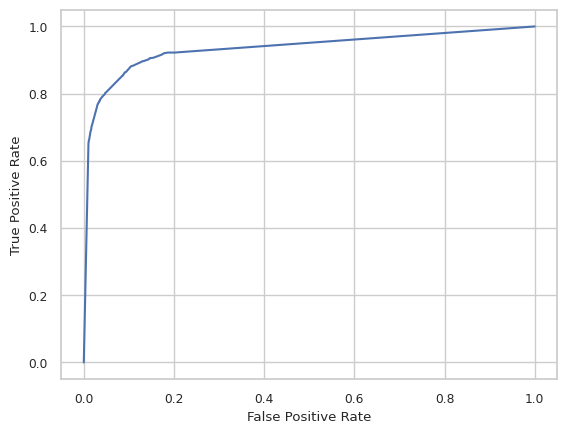

In [ ]:
#Предсказываем вероятности
y_pred_proba1 = model1.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
print("AUC: %.3f" % auc)

AUC: 0.934


In [ ]:
import plotly.graph_objs as go

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

## 2. SVM

1. Обучение модели SVM

In [ ]:
from sklearn.svm import SVC

# Создание и обучение модели
model2 = SVC(
    kernel='rbf',          # Ядро: 'linear', 'rbf', 'poly', 'sigmoid'
    probability=True,
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42
)
model2.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred2 = model2.predict(X_test)

2. Оценка модели

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred2))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred2))

Accuracy: 0.72366026289181

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      7278
           1       0.48      0.72      0.58      2612

    accuracy                           0.72      9890
   macro avg       0.68      0.72      0.69      9890
weighted avg       0.77      0.72      0.74      9890


Матрица ошибок:
[[5276 2002]
 [ 731 1881]]


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred2)
print("Точность:", accuracy_score(y_test, y_pred2))
print("Точность:", precision_score(y_test, y_pred2, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred2, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred2, average = 'binary'))

Точность: 0.72366026289181
Точность: 0.48441926345609065
Полнота: 0.7201378254211332
F1-мера: 0.5792147806004619


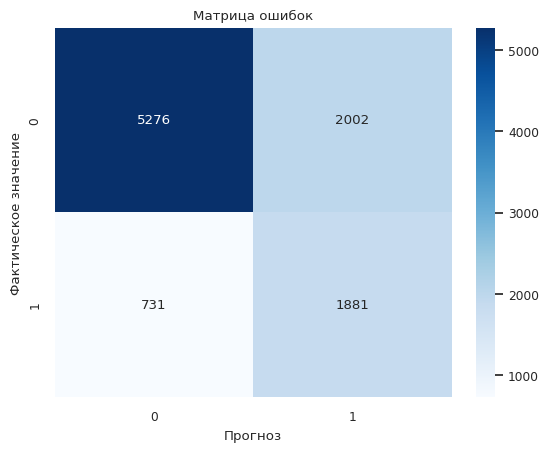

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

3. Построение ROC-кривой

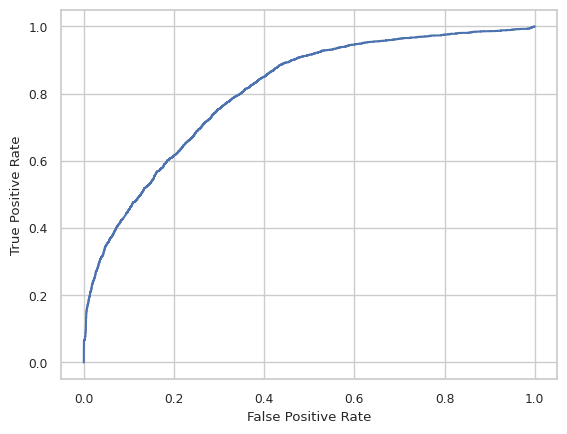

In [ ]:
#Предсказываем вероятности
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba2)
print("AUC: %.3f" % auc)

AUC: 0.807


In [ ]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

## 3. Random Forest (Случайный лес)

1. Обучение модели Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание модели
model3 = RandomForestClassifier(
    n_estimators=100,  # Количество деревьев
    max_depth=20,       # Максимальная глубина
    class_weight='balanced',
    random_state=42
)

# Обучение
model3.fit(X_train, y_train)

# Предсказание
y_pred3 = model3.predict(X_test)

2. Оценка модели

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred3))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred3))

Accuracy: 0.9239635995955511

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7278
           1       0.88      0.82      0.85      2612

    accuracy                           0.92      9890
   macro avg       0.91      0.89      0.90      9890
weighted avg       0.92      0.92      0.92      9890


Матрица ошибок:
[[6995  283]
 [ 469 2143]]


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred3)
print("Точность:", accuracy_score(y_test, y_pred3))
print("Точность:", precision_score(y_test, y_pred3, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred3, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred3, average = 'binary'))

Точность: 0.9239635995955511
Точность: 0.8833470733718054
Полнота: 0.8204441041347627
F1-мера: 0.850734418420008


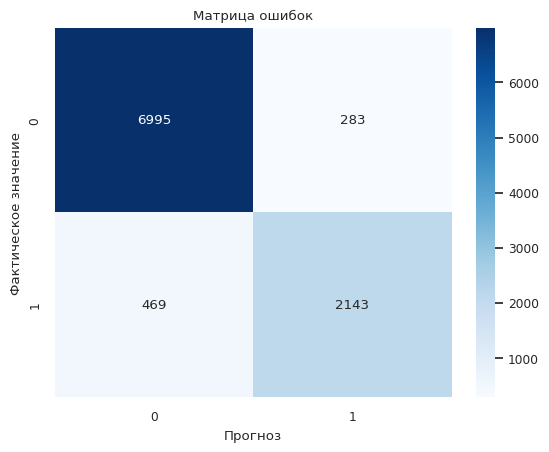

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

3. Построение ROC-кривой

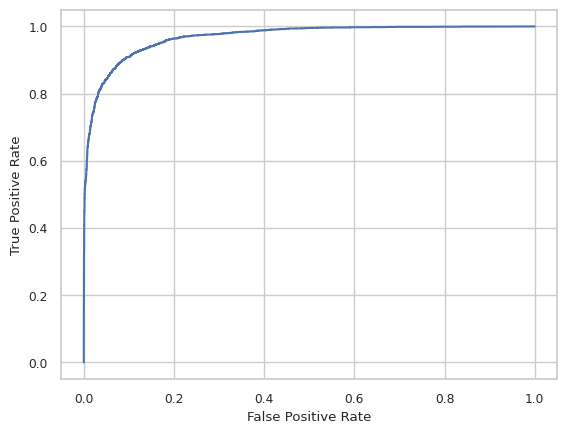

In [ ]:
#Предсказываем вероятности
y_pred_proba3 = model3.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba3)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba3)
print("AUC: %.3f" % auc)

AUC: 0.969


In [ ]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

## 4. Gradient Boosting (Градиентный бустинг)

1. Обучение модели Random Forest

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


model4 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=9,
    random_state=42
)

model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

2. Оценка модели

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred4))
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred4))
print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred4))

Accuracy: 0.9588473205257836

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7278
           1       0.98      0.86      0.92      2612

    accuracy                           0.96      9890
   macro avg       0.97      0.93      0.94      9890
weighted avg       0.96      0.96      0.96      9890


Матрица ошибок:
[[7240   38]
 [ 369 2243]]


In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred4)
print("Точность:", accuracy_score(y_test, y_pred4))
print("Точность:", precision_score(y_test, y_pred4, average = 'binary'))
print("Полнота:", recall_score(y_test, y_pred4, average = 'binary'))
print("F1-мера:", f1_score(y_test, y_pred4, average = 'binary'))

Точность: 0.9588473205257836
Точность: 0.9833406400701447
Полнота: 0.858728943338438
F1-мера: 0.9168199468628653


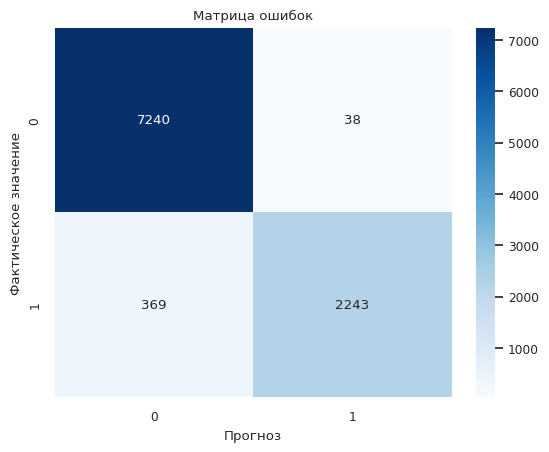

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

3. Построение ROC-кривой

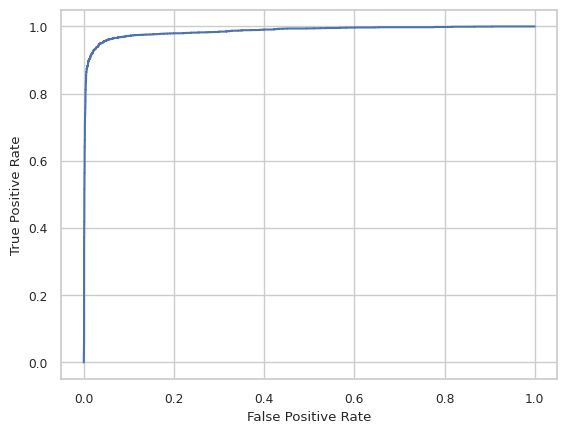

In [ ]:
#Предсказываем вероятности
y_pred_proba4 = model4.predict_proba(X_test)[:, 1]
# Строим кривую ROC
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba4)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
auc = metrics.roc_auc_score(y_test, y_pred_proba4)
print("AUC: %.3f" % auc)

AUC: 0.986


In [ ]:
trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.2f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

4. Определим топ-5 признаков, которые внесли наибольший вклад в работу модели

In [ ]:
# Получаем важность признаков
feature_importance = model4.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature_{i}" for i in range(X_train.shape[1])]

# Сортируем и выбираем топ-5
top_indices = np.argsort(feature_importance)[-5:][::-1]  # [::-1]
top_features = [feature_names[i] for i in top_indices]
top_importance = feature_importance[top_indices]

print("Топ-5 важных признаков (Gradient Boosting):")
for feature, importance in zip(top_features, top_importance):
    print(f"{feature}: {importance:.4f}")

Топ-5 важных признаков (Gradient Boosting):
fact_pay: 0.4345
nmck: 0.2766
duration: 0.1234
oik: 0.0649
rn_eis: 0.0264


## Сравнительная таблица моделей прогнозирования статуса расторжения контракта.

In [ ]:
# Создание сравнительной таблицы по всем тестируемым моделям
result = {
    'Model': ['Logistic Regression + SMOTE', 'Decision Tree', 'SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.92, 0.89, 0.72, 0.92, 0.95],
    'Precision': [0.79, 0.75, 0.48, 0.88, 0.98],
    'Recall': [0.93, 0.88, 0.72, 0.82, 0.86],
    'F1-score': [0.85, 0.81, 0.58, 0.85, 0.92],
    'AUC-ROC': [0.975, 0.935, 0.803, 0.969, 0.986]
}

In [ ]:
# Преобразуем словарь в DataFrame
table_df = pd.DataFrame(result)

# Устанавливаем 'Model' как индекс
table_df.set_index('Model', inplace=True)

# Сортировка по F1-score (от лучшего к худшему)
results_df = table_df.sort_values('F1-score', ascending=False)

In [ ]:
def color_metrics(val):
    if val < 0.7: return 'color: red'
    elif val < 0.8: return 'color: orange'
    elif val < 0.9: return 'color: green'
    else: return 'color: black'

styled_df = results_df.style.applymap(color_metrics)

# Отображение
display(styled_df)

<ipython-input-47-9624fae073da>:7: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Accuracy,Precision,Recall,F1-score,AUC-ROC
Model,,,,,
Gradient Boosting,0.950000,0.980000,0.860000,0.920000,0.986000
Logistic Regression + SMOTE,0.920000,0.790000,0.930000,0.850000,0.975000
Random Forest,0.920000,0.880000,0.820000,0.850000,0.969000
Decision Tree,0.890000,0.750000,0.880000,0.810000,0.935000
SVM,0.720000,0.480000,0.720000,0.580000,0.803000


## Анализ таблицы

Для анализа мы рассмотрим пять ключевых показателей производительности моделей классификации:

- **Accuracy**: Общая правильность предсказаний модели.
- **Precision**: Доля верных положительных предсказаний среди всех положенных предсказанных объектов.
- **Recall**: Доля верно распознанных положительных объектов среди всех реальных положительных примеров.
- **F1-score**: Гармоническое среднее Precision и Recall, которое учитывает сбалансированность обеих характеристик.
- **AUC-ROC**: Обобщенная мера производительности модели, оценивающая её способность отличать положительные и отрицательные примеры.

---

### 1. Gradient Boosting
- **Accuracy**: $0.95$ (очень высокое значение)
- **Precision**: $0.98$ (почти идеальное распознавание положительных образцов)
- **Recall**: $0.86$ (некоторые реальные положительные образцы пропускаются)
- **F1-score**: $0.92$
- **AUC-ROC**: $0.986$ (одна из лучших способностей отделять положительный класс от отрицательного)

Модель демонстрирует выдающиеся результаты почти по всем показателям. Единственным недостатком является умеренный показатель recall, означающий некоторое число пропущенных положительных примеров. Однако высокие precision и accuracy делают эту модель привлекательной для большинства практических задач.

---

### 2. Logistic Regression + SMOTE
- **Accuracy**: $0.92$
- **Precision**: $0.79$ (средний показатель)
- **Recall**: $0.93$ (лучший показатель среди всех моделей)
- **F1-score**: $0.85$
- **AUC-ROC**: $0.975$

Несмотря на высокую отзывчивость (хороший recall), точность распознавания положительных примеров (precision) ниже, чем у остальных методов. Это означает, что значительное число ложных срабатываний (false positives) ухудшает общий балл. Высокая AUC-ROC подтверждает хорошую дискриминационную силу модели, однако наличие большого количества false positives снижает привлекательность данной модели.

---

### 3. Random Forest
- **Accuracy**: $0.92$
- **Precision**: $0.88$
- **Recall**: $0.82$
- **F1-score**: $0.85$
- **AUC-ROC**: $0.969$

Модели Random Forest удаётся поддерживать хороший баланс между точностью и чувствительностью. Хотя её показатели немного уступают градиентному бустингу, разница невелика. Высокое значение AUC-ROC также свидетельствует о хорошей общей характеристике отделения классов.

---

### 4. Decision Tree
- **Accuracy**: $0.89$
- **Precision**: $0.75$
- **Recall**: $0.88$
- **F1-score**: $0.81$
- **AUC-ROC**: $0.935$

Показатели Decision Tree заметно хуже предыдущих моделей. Несмотря на высокий recall, low precision ограничивает общее качество модели. Тем не менее, неплохая AUC-ROC показывает, что модель всё ещё обладает приемлемым уровнем дискриминационного потенциала.

---

### 5. SVM
- **Accuracy**: $0.72$
- **Precision**: $0.48$
- **Recall**: $0.72$
- **F1-score**: $0.58$
- **AUC-ROC**: $0.803$

SVM имеет самые низкие показатели практически по всем параметрам. Низкая точность и крайне низкая precision делают использование данной модели рискованным выбором. Относительно низкое значение AUC-ROC дополнительно подчеркивает слабость модели в отделении классов.

---

## Итоги сравнения моделей

Лучшей по большинству критериев является модель **Gradient Boosting**. Она обеспечивает наиболее точную классификацию и хорошее разделение классов, демонстрируя превосходство по всем ключевым характеристикам, кроме recall, где незначительно уступает логистической регрессии с SMOTE.

Логистическая регрессия с SMOTE имеет лучший recall, но худшую точность, что делает её подходящей для ситуаций, где главным требованием является минимальное количество пропуска положительных примеров.

Остальные методы показывают посредственную производительность, особенно SVM, который существенно отстал по всем показателям.